In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [145]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
import math

## Load data

In [60]:
y_train, input_train, ids_train = load_csv_data('train.csv', sub_sample=False)
print(yb_train.shape)
print(input_train.shape)

(250000,)
(250000, 30)


In [61]:
y_test, input_test, ids_test = load_csv_data('test.csv', sub_sample=False)
print(yb_test.shape)
print(input_test.shape)

(568238,)
(568238, 30)


## Exploratory data analysis

In [11]:
import pandas as pd #library to handle tables and have plots easily. Should be alright. Better if we ask.
import seaborn as sns #library for the plot

In [17]:
input_train.shape  #30 features and 250'000 points
input_test.shape   #30 features and 568'238 points

(568238, 30)

In [18]:
# Train/test ratio
train_perc = input_train.shape[0]/(input_train.shape[0] + input_test.shape[0])*100
print(train_perc)

test_perc = 100 - train_perc
print(test_perc)

30.553457551470352
69.44654244852964


In [19]:
df_train = pd.DataFrame.from_records(input_train)
df_train.shape
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [20]:
#Positive sample data
train_pos = df_train.iloc[yb_train==1].copy()
train_pos.shape
train_pos.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,...,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000,85667.000000
mean,85.568853,32.036287,80.387179,74.869878,-619.259794,-426.480218,-621.167191,2.386378,18.445728,182.989011,...,0.008644,233.540845,1.159968,-231.992190,-297.275085,-297.282305,-598.857487,-620.415028,-620.416985,91.295672
std,202.476222,30.157585,21.457651,74.262307,486.123573,794.338643,483.686830,0.688971,23.585736,118.993901,...,1.811633,125.801926,0.941634,502.046188,456.737043,456.731835,512.524404,484.645297,484.642048,98.670344
min,-999.000000,0.000000,7.520000,0.000000,-999.000000,-999.000000,-999.000000,0.264000,0.000000,46.300000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,105.592000,10.364000,67.382500,23.462500,-999.000000,-999.000000,-999.000000,1.874500,2.796000,94.683000,...,-1.554000,146.371500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,120.553000,24.403000,79.386000,54.376000,-999.000000,-999.000000,-999.000000,2.526000,10.651000,153.002000,...,0.019000,207.892000,1.000000,53.294000,-1.387000,-1.348000,-999.000000,-999.000000,-999.000000,68.038000
75%,134.739000,45.729000,91.936000,105.466500,1.965000,199.464500,-3.381000,2.968000,27.225000,233.490500,...,1.580000,290.941000,2.000000,93.771500,0.943500,0.884000,41.273000,-1.327000,-1.035000,138.575000
max,977.333000,570.115000,789.538000,2834.999000,8.503000,4974.979000,16.648000,5.208000,2834.999000,1513.470000,...,3.142000,1391.891000,3.000000,738.235000,4.499000,3.141000,421.566000,4.500000,3.141000,1193.476000


In [21]:
#Negative samples data
train_neg = df_train.iloc[yb_train==-1].copy()
train_neg.shape
train_neg.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,...,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000,164333.000000
mean,-119.186024,58.208042,81.596313,49.047438,-754.900355,-692.338008,-755.329855,2.366178,19.163180,145.630729,...,-0.019900,197.419574,0.884929,-408.976389,-452.416215,-452.420779,-741.135235,-755.364462,-755.358911,63.560706
std,464.171448,34.520722,47.911004,55.326307,429.806453,552.692423,429.051909,0.827583,21.553753,111.836871,...,1.812459,125.087463,0.982473,538.515064,497.276878,497.273065,454.372939,428.989649,428.999436,96.314127
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.141000,18.534000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,53.224000,31.362000,55.532000,8.360000,-999.000000,-999.000000,-999.000000,1.774000,2.866000,71.556000,...,-1.584000,113.838000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,92.126000,60.812000,69.705000,32.880000,-999.000000,-999.000000,-999.000000,2.472000,13.346000,107.624000,...,-0.044000,165.908000,1.000000,33.418000,-2.299000,-2.596000,-999.000000,-999.000000,-999.000000,33.620000
75%,122.460000,80.248000,92.716000,65.653000,-999.000000,-999.000000,-999.000000,2.957000,27.793000,177.986000,...,1.550000,246.004000,1.000000,64.396000,0.193000,0.245000,-999.000000,-999.000000,-999.000000,89.782000
max,1192.026000,690.075000,1349.351000,1053.807000,7.888000,4062.147000,16.690000,5.684000,466.525000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.492000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [28]:
print(train_pos.shape)
print(train_neg.shape)
pos_perc = train_pos.shape[0]/(train_neg.shape[0] + train_pos.shape[0])*100
print("percentage of positive is {}".format(pos_perc))
neg_perc = 100 - pos_perc
print("percentage of negative is {}".format(neg_perc))

(85667, 30)
(164333, 30)
percentage of positive is 34.266799999999996
percentage of negative is 65.73320000000001


In [40]:
# C'est cool ça donne la différence des features entre les Boson et les pas Boson
# on voit des bonnes différences (sinon 0 partout)
difference_description = train_pos.describe() - train_neg.describe()
difference_description

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,-78666.000000,-78666.000000,-78666.000000,-78666.00000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,...,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000,-78666.000000
mean,204.754877,-26.171756,-1.209135,25.82244,135.640561,265.857790,134.162664,0.020200,-0.717452,37.358282,...,0.028544,36.121271,0.275039,176.984199,155.141130,155.138474,142.277749,134.949433,134.941926,27.734966
std,-261.695227,-4.363138,-26.453353,18.93600,56.317120,241.646221,54.634922,-0.138612,2.031983,7.157030,...,-0.000826,0.714463,-0.040839,-36.468875,-40.539835,-40.541230,58.151465,55.655648,55.642612,2.356217
min,0.000000,0.000000,1.191000,0.00000,0.000000,0.000000,0.000000,0.056000,0.000000,0.196000,...,-0.001000,-4.856000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.368000,-20.998000,11.850500,15.10250,0.000000,0.000000,0.000000,0.100500,-0.070000,23.127000,...,0.030000,32.533500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.427000,-36.409000,9.681000,21.49600,0.000000,0.000000,0.000000,0.054000,-2.695000,45.378000,...,0.063000,41.984000,0.000000,19.876000,0.912000,1.248000,0.000000,0.000000,0.000000,34.418000
75%,12.279000,-34.519000,-0.780000,39.81350,1000.965000,1198.464500,995.619000,0.011000,-0.568000,55.504500,...,0.030000,44.937000,1.000000,29.375500,0.750500,0.639000,1040.273000,997.673000,997.965000,48.793000
max,-214.693000,-119.960000,-559.813000,1781.19200,0.615000,912.832000,-0.042000,-0.476000,2368.474000,-338.992000,...,0.000000,-612.085000,0.000000,-382.338000,0.007000,0.000000,-299.890000,0.000000,-0.001000,-439.957000


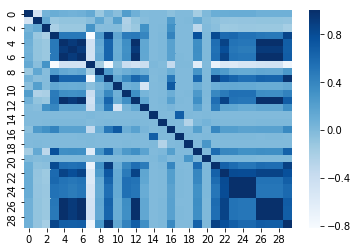

In [29]:
#Should remove correlated data ?? Not sure.
plt.figure(figsize=(6,4))
sns.heatmap(train_pos.corr(),cmap='Blues',annot=False)    #sns is used here

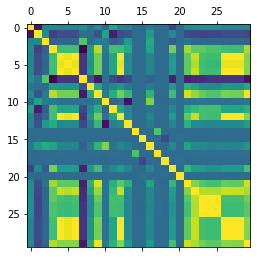

In [30]:
correl = plt.matshow(df_train.corr())

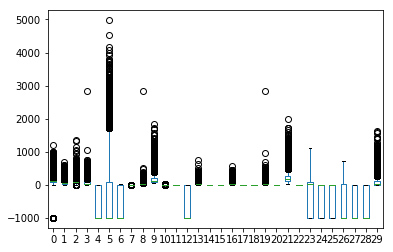

In [31]:
df_train.plot.box()

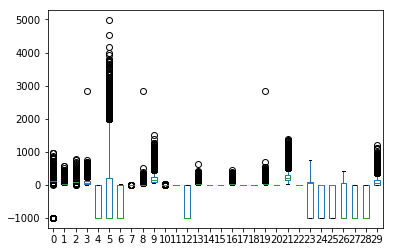

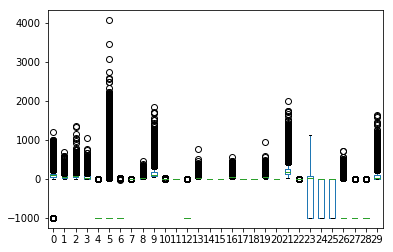

In [32]:
#On peut voir des figures qui ont beaucoup de différences
train_pos.plot.box()
train_neg.plot.box()
# Remove outliers ?

## Standardize data

In [41]:
def standardize_train(x):
    ''' standardize training set
    '''
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data, np.mean(x, axis=0), np.std(centered_data, axis=0)

def standardize_test(x, mean, std):
    ''' standardize test set with same values as training set
    '''
    return (x-mean)/std

In [ ]:
# IDEE: on pourrait ausi tenter build_polynomial comme dans les déries si on est motivés

In [51]:
# Standardise data
# Careful to standardize the x_test with the mean and std of x_train (already made )
x_train, mean, std = standardize_train(input_train)
x_test = standardize_test(input_test, mean, std)

In [52]:
print(x_train.shape)
print(x_test.shape)

(568238, 30)


## MSE method GD and SGD from lab02
I put it here to use as reference for the function to implement.

Could try it too  --> will be less good than Ridge if find good lambda

In [45]:
#From lab02 correction
# MSE GD and SGD
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

def compute_gradient_mse(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad, err

def gradient_descent_mse(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad, err = compute_gradient_mse(y, tx, w)
        loss = calculate_mse(err)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

## Should be useful

In [119]:
#besoin pour SGD, prise de lab02
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    """
    Generate a minibatch iterator for a dataset.
    Takes as input two iterables (here the output desired values 'y' and the input data 'tx')
    Outputs an iterator which gives mini-batches of `batch_size` matching elements from `y` and `tx`.
    Data can be randomly shuffled to avoid ordering in the original data messing with the randomness of the minibatches.
    Example of use :
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
        <DO-SOMETHING>
    """
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]      

In [196]:
# Celle du lab03, juste sans les degrés
def plot_train_test(train_errors, test_errors, lambdas):
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    #plt.ylabel("RMSE")
    plt.ylabel("Loss")
    plt.title("Ridge regression for polynomial degree ")
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    #plt.savefig("ridge_regression")

# Methods to implement 
P.2 of project description

-  least_square
-  least_square_GD
-  least_square_SGD

-  ridge_regression
-  logistic_regression
-  reg_logistic_regression

All function should return (w, loss) <br>
Later add them in implementations.py

In [126]:
# Define the parameters of the algorithm. (probably change afterwards)
max_iters = 100
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.zeros(x_train.shape[1])

## Least square 

In [127]:
def least_squares(y, tx):
    """Compute the optimal w and the loss with least square technique"""
    """Required by project description"""
    a = tx.T.dot(tx) 
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)                #p.7 du cours least squares
    err = y - tx @ w
    loss = 1/2*np.mean(err**2)                 #p.3 du cours least squares
    return w, loss

w, loss = least_squares(y_train, x_train)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of least squares is {}".format(loss))

w is [ 2.93788273e-02 -2.52531475e-01 -2.54791124e-01 -3.03696824e-02
 -1.40144730e+00  2.95701640e-01 -1.07889473e+01  2.67880862e-01
 -2.44934965e-03 -3.28833236e+02 -1.82647888e-01  1.14039627e-01
  2.05045962e+01  6.38864393e+01 -3.18961870e-04 -1.80884296e-03
  6.29955742e+01 -4.48641560e-04  1.54379302e-03  1.21462700e-01
  3.95268723e-04 -6.33223477e-02 -2.06747092e-01 -1.16655763e-01
  9.86256315e-02  1.67907715e-01 -3.35146217e-02 -2.98358686e+00
 -5.36388095e+00  2.78483752e+02] 
 of shape (30,)

 loss of least squares is 0.3889523149372254


In [128]:
def compute_gradient_least_square(y, tx, w):
    """Compute the gradient of least square."""
    """Required by project description"""
    '''
    print("y is {}".format(y.shape))
    print("tx is {}".format(tx.shape))
    print("w is {}".format(w.shape))
    a = tx.dot(w)
    print("a is {}".format(a.shape))
    '''
    err = y - tx.dot(w)
    #print("err is {}".format(err.shape))
    #b = -tx.T.dot(err)
    #print("b is {}".format(b.shape))
    grad = -tx.T.dot(err) / len(err)          #p.5 du cours least squares
    return grad, sum(err)                     #not sure what to return as err 

#compute_gradient_least_square(y_train, x_train, w)
grad, err = compute_gradient_least_square(y_train, x_train, w)
print("grad is {} \n of shape {}".format(grad, grad.shape))
print("\nerr of least squares is {}".format(err))

grad is [-4.21945856e-15  4.63685979e-14  8.90636898e-15 -3.46570232e-13
 -3.84491074e-13  1.98141379e-14 -4.01405714e-13  1.65468691e-13
  1.18532899e-13  1.03033926e-13  1.66181167e-14 -1.42359909e-13
 -1.08426761e-13 -9.13914846e-14  1.24600774e-16 -9.32232069e-16
  1.10333076e-14  1.56512669e-15 -5.90659965e-16 -4.17158219e-14
 -3.19585070e-15 -1.54474037e-13  2.81290795e-13 -2.57155079e-14
 -3.95210861e-13 -3.08404651e-13  1.18270165e-13 -5.97248807e-13
  5.06876034e-14  5.49495098e-13] 
 of shape (30,)

err of least squares is -78665.99999991436


In [129]:
def least_squares_GD(y, tx, w_initial, max_iters, gamma):
    """Gradient descent algorithm with least squares."""
    """Required by project description"""
    w = w_initial
    for n_iter in range(max_iters):
        # compute gradient and error
        grad, err = compute_gradient_least_square(y, tx, w)
        # gradient w by descent update
        w = w - gamma * grad
        # calculate loss
        loss = 1/2*np.mean(err**2)            
    return w, loss

w, loss = least_squares_GD(y_train, x_train, w_initial, max_iters, gamma)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of least squares is {}".format(loss))

w is [-3.41259548e+85  3.46454478e+85  4.99588368e+84 -1.11049420e+86
 -1.32676201e+86 -1.28744152e+86 -1.32667308e+86  6.27829189e+85
 -5.32190888e+85 -1.25675331e+86 -8.10235405e+84 -7.77066882e+85
 -1.32677897e+86 -4.55540123e+85 -1.00021246e+84 -6.87802351e+83
 -3.92481325e+85 -2.14412005e+84  1.75089120e+83 -6.58112482e+85
 -1.16463964e+84 -1.18177268e+86 -1.37574884e+86 -1.12061419e+86
 -1.07024342e+86 -1.07024932e+86 -1.33365725e+86 -1.32677331e+86
 -1.32676629e+86 -1.29106278e+86] 
 of shape (30,)

 loss of least squares is 6.479967574154229e+153


In [130]:
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    """Stochastic Gradient Descent algorithm with least squares."""
    """Required by project description"""
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, err = compute_gradient_least_square(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = 1/2*np.mean(err**2)                                  #TO CHECK p.3 least squares
    return w, loss

w, loss = least_squares_SGD(y_train, x_train, w_initial, max_iters, gamma)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of least squares is {}".format(loss))

w is [ 5.12122439e+67 -1.28258285e+68 -1.17732378e+67  3.97397278e+68
  1.52874150e+68  2.71829091e+68  1.51695511e+68 -1.82919524e+68
  4.19043302e+67  2.77582353e+68 -7.92450846e+67  3.33572124e+67
  1.52374861e+68  2.37248592e+68 -4.63610514e+67 -8.14066852e+67
  1.09192694e+68  2.83923500e+67 -9.59713832e+67  3.36566899e+68
 -8.17963051e+67  2.60113438e+68  9.83114304e+67  1.09732965e+68
  7.43761976e+67  7.45450783e+67  1.49724190e+68  1.51527518e+68
  1.52587802e+68  2.48852194e+68] 
 of shape (30,)

 loss of least squares is 1.0155517907843423e+136


## Ridge regression

In [123]:
# Should do grid search  TO DO
lambda_ = 0.01

In [132]:
##################
# Je suis un peu confuse. Est ce que ce qu'il veut c'est ça ou bien ce que j'ai fait aux fonctions ridge_GD et ridge_SGD ?? 
# ridge_GD et ridge_SGD sont juste en-dessous
def ridge_regression(y, tx, lambda_):
    """Ridge regression."""
    """Required by project description"""
    lambd = 2 * tx.shape[0] * lambda_
    a = tx.T.dot(tx) + lambd * np.identity(tx.shape[1])
    b = tx.T.dot(y) 
    w = np.linalg.solve(a, b) 
    loss = (1/2) * np.mean(err**2) + lambda_ * (np.linalg.norm(w,2))**2   #TO CHECK p.3 ridge regression
    return w, loss

w, loss = ridge_regression(y_train, x_train, lambda_)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of ridge regression is {}".format(loss))

w is [ 0.03572402 -0.24077855 -0.21610016 -0.01054923 -0.01919922  0.34814992
 -0.03018983  0.23504977 -0.01013674 -0.00087247 -0.15674991  0.11455458
 -0.02161131  0.18503225 -0.00076269 -0.00130455  0.23850622 -0.00086979
  0.00249252  0.10383837  0.00113401 -0.06198121 -0.14991608  0.03645409
  0.04367213  0.0436772  -0.02328488 -0.02309077 -0.0234825  -0.09703028] 
 of shape (30,)

 loss of ridge regression is 3094169777.997928


In [137]:
def compute_gradient_ridge(y, tx, w, lambda_):
    """Not required specifically""" 
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err) + (2 * lambda_* w)
    return grad, err

In [138]:
def ridge_GD(y, tx, initial_w, max_iters, gamma, lambda_):
    """Gradient descent algorithm with Ridge."""
    """Not required specifically""" 
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and error
        grad, err = compute_gradient_ridge(y, tx, w, lambda_)
        #print("grad is {} \n of shape {}".format(grad, grad.shape))
        #print("\n err of least squares is {}".format(err))
        # gradient w by descent update
        w = w - gamma * grad
        # calculate loss
        loss = 1/2*np.mean(err**2)            
    return w, loss

w, loss = ridge_GD(y_train, x_train, w_initial, max_iters, gamma, lambda_)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of ridge_GD is {}".format(loss))

w is [-4.09676698e+85  4.15913130e+85  5.99747947e+84 -1.33313076e+86
 -1.59275684e+86 -1.54555321e+86 -1.59265008e+86  7.53699028e+85
 -6.38886757e+85 -1.50871251e+86 -9.72674810e+84 -9.32856522e+85
 -1.59277720e+86 -5.46868725e+85 -1.20073927e+84 -8.25695861e+83
 -4.71167634e+85 -2.57398227e+84  2.10191723e+83 -7.90053642e+85
 -1.39813149e+84 -1.41869944e+86 -1.65156476e+86 -1.34527964e+86
 -1.28481032e+86 -1.28481740e+86 -1.60103447e+86 -1.59277041e+86
 -1.59276198e+86 -1.54990048e+86] 
 of shape (30,)

 loss of least squares is 3.958772560525718e+172


In [139]:
def ridge_SGD(y, tx, initial_w, max_iters, gamma, lambda_):
    """Stochastic Gradient Descent algorithm with least squares."""
    """Not required specifically""" #Implicitely requested I think
    
    w = initial_w
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, err = compute_gradient_ridge(y_batch, tx_batch, w, lambda_)    
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = (1/2) * np.mean(err**2) + lambda_ * (np.linalg.norm(w,2))**2
    return w, loss

w, loss = ridge_SGD(y_train, x_train, w_initial, max_iters, gamma, lambda_)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of ridge SGD is {}".format(loss))

w is [-6.85136087e+67  2.84776478e+67  1.32828663e+67 -1.78076998e+67
 -1.62933901e+67 -1.54004137e+67 -1.62933552e+67  9.35389971e+66
 -6.77926997e+66 -2.00460557e+67  5.00502084e+66 -2.85856608e+67
 -1.62935162e+67 -1.46984169e+67  2.57135042e+67  1.21228591e+67
 -6.12147764e+66 -3.03829498e+67 -4.96246852e+66  1.10440939e+67
 -3.90554237e+67 -3.84482004e+66 -2.59359758e+67 -3.17909362e+67
 -3.20042735e+67 -3.20062334e+67 -1.62844603e+67 -1.62935074e+67
 -1.62933057e+67 -1.89251409e+67] 
 of shape (30,)

 loss of ridge_SGD is 1.0228413536079138e+135


In [198]:
lambdas = np.logspace(-5, 0, 15)

rmse_tr = []
rmse_te = []
for ind, lambda_ in enumerate(lambdas):
    w, loss_tr = ridge_SGD(y_train, x_train, w_initial, max_iters, gamma, lambda_)
    rmse_tr.append(np.sqrt(2*loss_tr))
    loss_te = (1/2) * np.mean((y_test - x_test.dot(w))**2) + lambda_ * (np.linalg.norm(w,2))**2
    rmse_te.append(np.sqrt(2*loss_te))

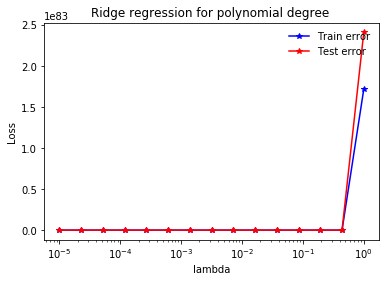

In [199]:
# Grid search to choose lambda
plot_train_test(rmse_tr, rmse_te, lambdas)

## Logistic regression
Debugged but not sure from here: Il y aura probablement une correction de labo pour améliorer / re-vérifier les fonctions de logistic regression

In [176]:
def sigmoid(tx, w):
    """Compute sigmoid function"""
    z = np.array(np.exp(-tx.dot(w)))
    return 1./(1 + z)

value = sigmoid(x_train, w_initial)
print(value)

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


In [180]:
def compute_logreg_loss(y, tx, w):  #np.log parce que math.log fonctionne pas.. J'ai toujours pas compris pourquoi.
    """Compute error and gradient of logistic regression"""
    sig = sigmoid(tx, w)
    loss = sum(-y * np.log(sig) - (1-y) * np.log(1-sig))/len(y)
    return loss

loss = compute_logreg_loss(y_train, x_train, w_initial)
print("loss is {}".format(loss))

loss is 0.6931471805620133


In [181]:
def compute_logreg_grad(y, tx, w):
    """Compute error and gradient of logistic regression""" 
    sig = sigmoid(tx, w)
    err  = sig - y
    grad = tx.T.dot(err)/len(y)
    return grad

grad = compute_logreg_grad(y_train, x_train, w_initial)
print("grad is {} \n of shape {}".format(grad, grad.shape))

grad is [-0.22700103  0.33357651  0.01334131 -0.18274659 -0.13445082 -0.18202497
 -0.13341468 -0.01162345  0.01451087 -0.14545203  0.18547229 -0.25794773
 -0.13416605 -0.22328862  0.00089534  0.0041789   0.03032475 -0.00143922
 -0.00391589 -0.02132456 -0.00709562 -0.12863626 -0.12676524 -0.14959835
 -0.14282589 -0.14282473 -0.13356652 -0.1340891  -0.13408034 -0.12747392] 
 of shape (30,)


In [182]:
def logistic_regression(y, tx, initial_w, max_iters, gamma): #SGD  (GD easy to implement from here)
    """Stochastic Gradient Descent algorithm with logistic regression."""
    """Required by project description"""
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient
            grad = compute_logreg_grad(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # compute a stochastic loss
            compute_logreg_loss(y_batch, tx_batch, w)
    return w, loss

w, loss = logistic_regression(y_train, x_train, w_initial, max_iters, gamma)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of ridge_SGD is {}".format(loss))

C:\Users\Pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


w is [ 13.79014003   1.18069931   4.85473378  -5.93117983  -0.92947559
   3.29942359  -0.985513     8.54924563  -2.0749505   -2.22792983
 -10.83534165   5.36603698  -0.94351984  10.23170989   0.73962177
  -9.26736865  -2.26742185  -5.55235638   5.75209888  -5.07035053
   3.56189272  -4.31593033  -3.11724416  -2.46987939  -1.88689039
  -1.89608848  -0.71163019  -0.93253227  -0.94261956  -4.45916869] 
 of shape (30,)

 loss of ridge_SGD is 0.6931471805620133


## Regularized Logistic Regression

In [184]:
def compute_logreg_reg_loss(y, tx, w, lambda_):
    """Compute error and gradient of logistic regression"""
    reg = ( lambda_/(2*len(y)) ) * sum(w**2)
    loss = compute_logreg_loss(y, tx, w) + reg
    return loss

loss = compute_logreg_reg_loss(y_train, x_train, w_initial, lambda_)
print("loss is {}".format(loss))

loss is 0.6931471805620133


In [191]:
def compute_logreg_reg_grad(y, tx, w, lambda_):
    """Compute error and gradient of logistic regression"""     
    grad = compute_logreg_grad(y, tx, w) 
    reg = (lambda_/len(y)) * w[1:]
    grad[1:] = grad[1:] + reg            
    return grad

grad = compute_logreg_reg_grad(y_train, x_train, w_initial, lambda_)
print("grad is {} \n of shape {}".format(grad, grad.shape))

grad is [-0.22700103  0.33357651  0.01334131 -0.18274659 -0.13445082 -0.18202497
 -0.13341468 -0.01162345  0.01451087 -0.14545203  0.18547229 -0.25794773
 -0.13416605 -0.22328862  0.00089534  0.0041789   0.03032475 -0.00143922
 -0.00391589 -0.02132456 -0.00709562 -0.12863626 -0.12676524 -0.14959835
 -0.14282589 -0.14282473 -0.13356652 -0.1340891  -0.13408034 -0.12747392] 
 of shape (30,)


In [192]:
###########
# La loss de ridge SGD me semble particulièrement haute. A vérifier avec les plots (et/ou code).

def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """Stochastic Gradient Descent algorithm with REGULARIZED logistic regression."""
    """Required by project description"""
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient
            grad = compute_logreg_reg_grad(y_batch, tx_batch, w, lambda_)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # compute a stochastic loss
            loss = compute_logreg_reg_loss(y_batch, tx_batch, w, lambda_)
    return w, loss

w, loss = reg_logistic_regression(y_train, x_train, lambda_, w_initial, max_iters, gamma)
print("w is {} \n of shape {}".format(w, w.shape))
print("\n loss of ridge_SGD is {}".format(loss))

C:\Users\Pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


w is [ 11.57843751  -7.38858274   2.93168998   3.56036955   0.11171079
   3.60874365   0.04452643   6.07760987  -6.396034    -2.01219616
 -10.74058853   6.03240018   0.08680976   7.04293124  13.12988096
   5.05735562  -5.97787277   1.70368771  -6.9016042    3.25250108
   0.81179105   2.46568098  -2.98750076  -0.79083508  -0.9752374
  -0.99384963  -0.11822211   0.09128909   0.08884612  -2.64006846] 
 of shape (30,)

 loss of ridge_SGD is -45.41675165436945


In [ ]:
#y_pred = predict_labels(weights, data)

## Choisir méthode:
(D'après moi mais hésitez pas à faire autrement si vous avez une meilleure idée)
- Pour chaque méthode: faire un plot de test_error (=loss) pour un grand nombre d'iteration (assez pour que on voit que l'erreur commence à remonter si possible). 
- Garder la valeur de n iter ou la test error était minimale (au cas où: risque d'être très long pour ridge si lambda_ trop grand)
- Comparer les loss de chaque méthode à leur n_iter optimale
- La meilleure est celle ou c'est le plus faible

En plus comme ça on aura des beau plots et des arguments pour le rapport.